In [1]:
# Cell 1: Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the cleaned (but not PCA-transformed) data
df = pd.read_csv('../data/cleaned_heart_disease.csv')
X = df.drop('target', axis=1)
y = df['target']

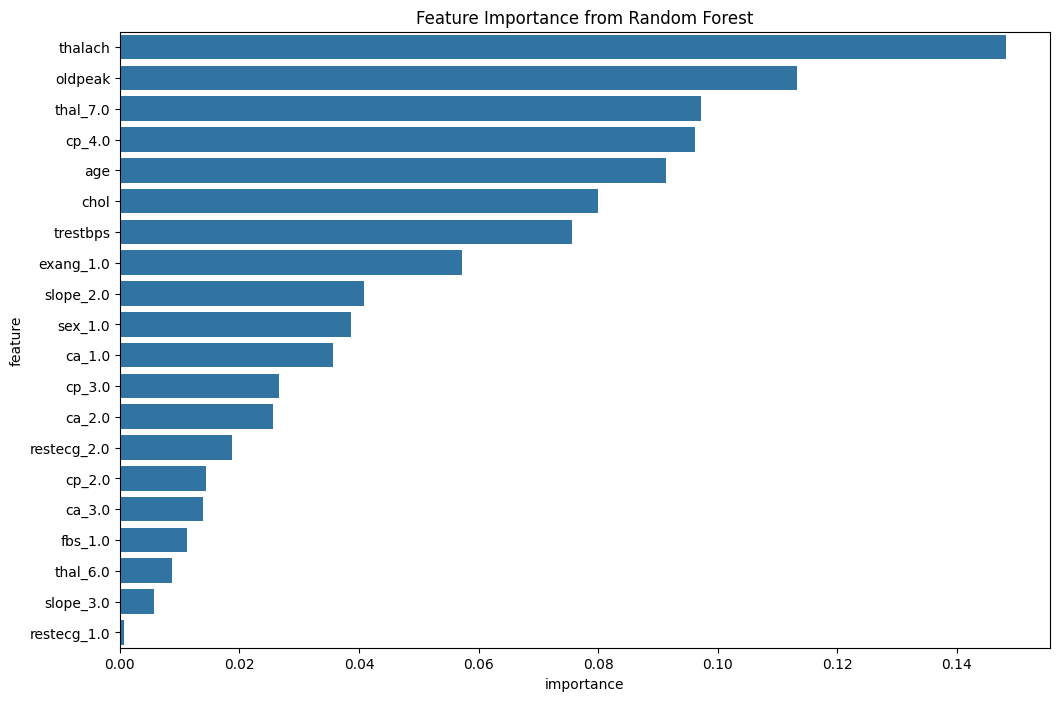

Top 5 features from Random Forest:
     feature  importance
3    thalach    0.148166
4    oldpeak    0.113265
19  thal_7.0    0.097233
8     cp_4.0    0.096145
0        age    0.091400


In [2]:
# Cell 2: Method 1 - Random Forest Feature Importance
# Train a Random Forest model to get feature importances
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

# Visualize
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=importances)
plt.title('Feature Importance from Random Forest')
plt.show()

print("Top 5 features from Random Forest:")
print(importances.head(5))

In [3]:
# Cell 3: Method 2 - Recursive Feature Elimination (RFE)
# RFE recursively removes features and builds a model on the remaining ones.
model = LogisticRegression(max_iter=1000)
# Select the top 10 features
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

# Get the selected features
selected_features_rfe = X.columns[fit.support_]

print("Selected Features from RFE:")
print(selected_features_rfe)

Selected Features from RFE:
Index(['oldpeak', 'sex_1.0', 'cp_2.0', 'cp_4.0', 'exang_1.0', 'slope_2.0',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_7.0'],
      dtype='object')


In [5]:
print(X.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_1.0', 'cp_2.0',
       'cp_3.0', 'cp_4.0', 'fbs_1.0', 'restecg_1.0', 'restecg_2.0',
       'exang_1.0', 'slope_2.0', 'slope_3.0', 'ca_1.0', 'ca_2.0', 'ca_3.0',
       'thal_6.0', 'thal_7.0'],
      dtype='object')


In [6]:
# Cell 4: Final Feature Selection & Saving (Corrected)

# This list is now built using YOUR actual column names.
final_features = [
    'oldpeak',
    'thalach',
    'age',
    'chol',
    'trestbps',
    'cp_3.0',      # Using your column name
    'exang_1.0',   # Using your column name
    'ca_1.0',
    'thal_7.0',    # Using an important 'thal' column that you have
    'sex_1.0'      # Using your column name
]

# This will now work without a KeyError
X_selected = X[final_features]
final_df = pd.concat([X_selected, y], axis=1)

# Save the final dataset with selected features
final_df.to_csv('../data/final_selected_features_heart_disease.csv', index=False)

print("\nFinal selected features dataset created and saved successfully!")


Final selected features dataset created and saved successfully!
